# Python Answer 7

In [9]:
import pandas as pd
import numpy as np

# reading the data from Answer 4
data = pd.read_csv('./Meteorite_data.csv')
data.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geoloc_type,geoloc_coordinate_long,geoloc_coordinate_lat
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,Point,6.08333,50.77500
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,Point,10.23333,56.18333
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,Point,-113.00000,54.21667
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,Point,-99.90000,16.88333
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,Point,-64.95000,-33.16667


## Meteorites that fell before year 2000

In [10]:
def meteorite_by(data: pd.DataFrame, column: str, value: int, constraint: str) -> pd.DataFrame:
    '''Return the data based on the constraint on a given column.'''

    if constraint == 'after':
        return data.loc[data[column] > value]
    elif constraint == 'before':
        return data.loc[data[column] < value]
    elif constraint == 'on':
        return data.loc[data[column] == value]
    else:
        return data

meteorite_before_2000 = meteorite_by(data, 'year', 2000, 'before')
meteorite_before_2000

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geoloc_type,geoloc_coordinate_long,geoloc_coordinate_lat
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,Point,6.08333,50.77500
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,Point,10.23333,56.18333
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,Point,-113.00000,54.21667
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,Point,-99.90000,16.88333
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,Point,-64.95000,-33.16667
...,...,...,...,...,...,...,...,...,...,...,...,...
994,Timochin,24004,Valid,H5,65500.0,Fell,1807.0,54.50000,35.20000,Point,35.20000,54.50000
995,Tirupati,24009,Valid,H6,230.0,Fell,1934.0,13.63333,79.41667,Point,79.41667,13.63333
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869.0,-7.08333,111.53333,Point,111.53333,-7.08333
998,Tjerebon,24012,Valid,L5,16500.0,Fell,1922.0,-6.66667,106.58333,Point,106.58333,-6.66667


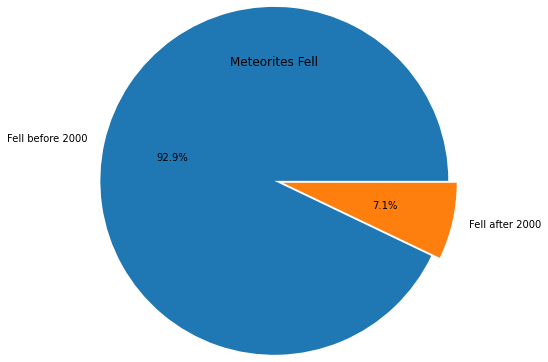

In [11]:
import matplotlib.pyplot as plt
# number of meteorite reported before 2000
before = meteorite_before_2000.shape[0]
# total meteorite reported
after = data.shape[0] - before

labels = 'Fell before 2000', 'Fell after 2000'
sizes = [before, after]
# creating figure and axes
fig, ax = plt.subplots()
# setting the title of plot
ax.set_title('Meteorites Fell')
# ploting a pie
ax.pie(
    x=sizes, 
    labels=labels,
    radius=2,
    autopct='%1.1f%%',
    explode=[0, 0.1])

plt.show()

Conclusion: So there are 929 meteorite were reported before 2000.

## Coordinates of meteorites that fell before year 1970

In [12]:
# coordinates of meteorites that fell before year 1970
columns = ['name', 'id', 'geoloc_coordinate_lat', 'geoloc_coordinate_long']
meteorite_before = meteorite_by(data, 'year', 1970, 'before')[columns]
meteorite_before

,name,id,geoloc_coordinate_lat,geoloc_coordinate_long
0,Aachen,1,50.77500,6.08333
1,Aarhus,2,56.18333,10.23333
2,Abee,6,54.21667,-113.00000
4,Achiras,370,-33.16667,-64.95000
5,Adhi Kot,379,32.10000,71.80000
...,...,...,...,...
994,Timochin,24004,54.50000,35.20000
995,Tirupati,24009,13.63333,79.41667
997,Tjabe,24011,-7.08333,111.53333
998,Tjerebon,24012,-6.66667,106.58333


In [13]:
import folium
def show_map(coordinates: pd.DataFrame, columns: list[str]) -> folium.Map:
    '''
    Show latitude and longitude on map.\n
    `coordinates`: DataFrame contains latitude and longitude column\n
    `columns`: names of latitude and longitude columns
        '''
    # initializing map class
    m = folium.Map(zoom_start=25)
    # creating tooltip
    tooltip = 'Click'
    for coordinate in coordinates[columns].values:
        if not pd.isna(coordinate).any():
            # putting latitude and longitude on map
            folium.Marker(
                location=coordinate[-2:], 
                tooltip=tooltip, 
                popup=coordinate[0],
                icon=folium.Icon(
                    color='red', 
                    icon='info-sign'
                    )
                ).add_to(m)
    return m

coordinates = meteorite_by(data, 'year', 1970, 'before')

show_map(coordinates, ['name', 'geoloc_coordinate_lat', 'geoloc_coordinate_long'])

[Click Here](https://deepnote.com/workspace/ganesh0-a9508bca-fb49-46f6-99eb-6b29fafee25b/project/PlacementAssignment-8d33f078-0ed1-453c-b49e-1d1c59411e16/notebook/Placement_Assignment_Ganesh%2FPython%2Fpython_answer_07-03c3ed26f2bd4df28440ac0fba668a3a) to see Map, as Map are not rendered on Github

## Meteorites having mass more than 10000 kg.

In [14]:
meteorite_by(data, 'mass', 10000, 'after')

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geoloc_type,geoloc_coordinate_long,geoloc_coordinate_lat
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,Point,-113.00000,54.21667
7,Agen,392,Valid,H5,30000.0,Fell,1814.0,44.21667,0.61667,Point,0.61667,44.21667
11,Aïr,424,Valid,L6,24000.0,Fell,1925.0,19.08333,8.38333,Point,8.38333,19.08333
16,Akyumak,433,Valid,"Iron, IVA",50000.0,Fell,1981.0,39.91667,42.81667,Point,42.81667,39.91667
27,Alfianello,466,Valid,L6,228000.0,Fell,1883.0,45.26667,10.15000,Point,10.15000,45.26667
...,...,...,...,...,...,...,...,...,...,...,...,...
991,Tieschitz,23989,Valid,H/L3.6,28000.0,Fell,1878.0,49.60000,17.11667,Point,17.11667,49.60000
992,Tilden,23998,Valid,L6,74800.0,Fell,1927.0,38.20000,-89.68333,Point,-89.68333,38.20000
994,Timochin,24004,Valid,H5,65500.0,Fell,1807.0,54.50000,35.20000,Point,35.20000,54.50000
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869.0,-7.08333,111.53333,Point,111.53333,-7.08333


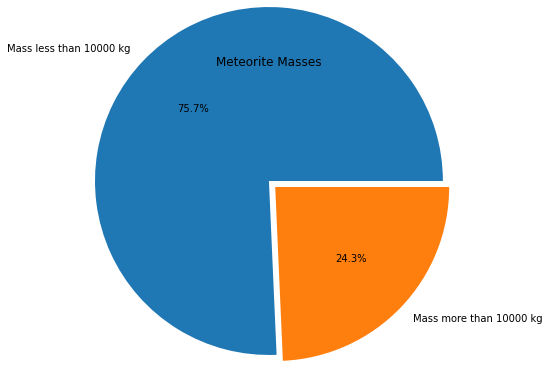

In [15]:
import matplotlib.pyplot as plt

# number of meteorite reported whose mass is more than 10000 kg
more_than_10000 = meteorite_by(data, 'mass', 10000, 'after').shape[0]

# total number of meterite reported
less_than_10000 = data.shape[0] - more_than_10000
labels = 'Mass less than 10000 kg', 'Mass more than 10000 kg'
sizes = [less_than_10000, more_than_10000]
# creating figure and axex
fig, ax = plt.subplots()
# setting the title
ax.set_title('Meteorite Masses')
# ploting pie
ax.pie(
    x=sizes, 
    labels=labels,
    radius=2,
    autopct='%1.1f%%',
    explode=[0, 0.1])

plt.show()

Reported Meteorite whose mass is more than 10000 kg on Map.

In [16]:
more_than_10000 = meteorite_by(data, 'mass', 10000, 'after')
show_map(more_than_10000, ['name', 'geoloc_coordinate_lat', 'geoloc_coordinate_long'])

[Click here](https://deepnote.com/workspace/ganesh0-a9508bca-fb49-46f6-99eb-6b29fafee25b/project/PlacementAssignment-8d33f078-0ed1-453c-b49e-1d1c59411e16/notebook/Placement_Assignment_Ganesh%2FPython%2Fpython_answer_07-03c3ed26f2bd4df28440ac0fba668a3a) to see Map, as Map are not rendered on Github